In [2]:
import pandas as pd
import os
os.chdir('C:\\Users\\bbaah\\OneDrive\\Desktop\\Current Students\\Darlene Echols\\pandas_for_everyone-master\\training')
covid19_data = pd.read_csv('../data/us-counties-covid19.csv', encoding='latin1')
covid19_data

,date,county,state,fips,cases,deaths
0,1/21/2020,Snohomish,Washington,53061.0,1,0
1,1/22/2020,Snohomish,Washington,53061.0,1,0
2,1/23/2020,Snohomish,Washington,53061.0,1,0
3,1/24/2020,Cook,Illinois,17031.0,1,0
4,1/24/2020,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
267169,6/24/2020,Sweetwater,Wyoming,56037.0,65,0
267170,6/24/2020,Teton,Wyoming,56039.0,113,1
267171,6/24/2020,Uinta,Wyoming,56041.0,157,0
267172,6/24/2020,Washakie,Wyoming,56043.0,38,5


In [3]:
state_county = covid19_data.groupby(['state', 'county'])[['cases', 'deaths']].sum()

In [4]:
state_county

cases  deaths
state   county                   
Alabama Autauga     12512     310
        Baldwin     19338     494
        Barbour      8589      57
        Bibb         4764      48
        Blount       4590      39
...                   ...     ...
Wyoming Sweetwater   2022       0
        Teton        7881      63
        Uinta        2178       0
        Washakie     1573     106
        Weston         29       0

[3076 rows x 2 columns]

In [5]:
states_over_time = covid19_data.groupby(['state', 'date'])[['cases', 'deaths']].sum()

In [6]:
states_over_time

cases  deaths
state   date                    
Alabama 3/13/2020      6       0
        3/14/2020     12       0
        3/15/2020     23       0
        3/16/2020     29       0
        3/17/2020     39       0
...                  ...     ...
Wyoming 6/5/2020     933      17
        6/6/2020     939      17
        6/7/2020     947      17
        6/8/2020     960      17
        6/9/2020     970      17

[6284 rows x 2 columns]

In [7]:
Alabama = states_over_time.iloc(0)

In [8]:
Alabama

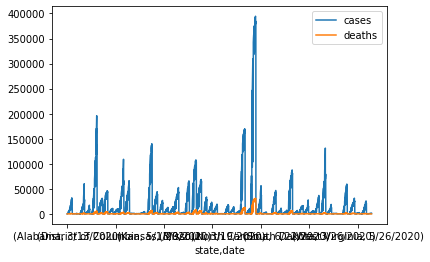

In [9]:
states_over_time.plot()

In [10]:
cases_over_time = covid19_data.groupby(['date'])[['cases', 'deaths']].sum()
cases_over_time

,cases,deaths
date,,
1/21/2020,1,0
1/22/2020,1,0
1/23/2020,1,0
1/24/2020,2,0
1/25/2020,3,0
...,...,...
6/5/2020,1912002,109304
6/6/2020,1934522,110032
6/7/2020,1953139,110422


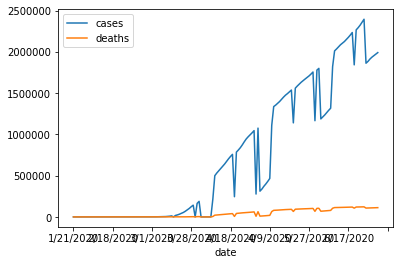

In [11]:
cases_over_time.plot()

In [12]:
dates_over_time =  covid19_data.groupby(['date'])[['date']].min()
dates_over_time

,date
date,
1/21/2020,1/21/2020
1/22/2020,1/22/2020
1/23/2020,1/23/2020
1/24/2020,1/24/2020
1/25/2020,1/25/2020
...,...
6/5/2020,6/5/2020
6/6/2020,6/6/2020
6/7/2020,6/7/2020


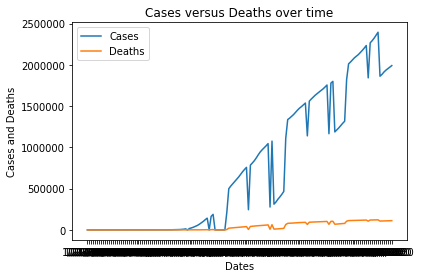

In [13]:
import matplotlib.pyplot as plt 
plt.plot(dates_over_time['date'], cases_over_time['cases'], label = 'Cases')
plt.plot(dates_over_time['date'], cases_over_time['deaths'], label = 'Deaths')

plt.xlabel('Dates')
plt.ylabel('Cases and Deaths') 
plt.title('Cases versus Deaths over time') 
plt.legend() 
plt.show() 

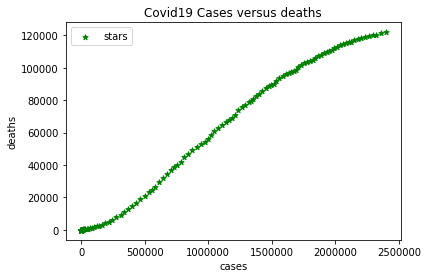

In [14]:
# x-axis values 
x = cases_over_time['cases']
# y-axis values 
y = cases_over_time['deaths'] 
  
# plotting points as a scatter plot 
plt.scatter(x, y, label= "stars", color= "green",  
            marker= "*", s=30) 
  
# x-axis label 
plt.xlabel('cases') 
# frequency label 
plt.ylabel('deaths') 
# plot title 
plt.title('Covid19 Cases versus deaths') 
# showing legend 
plt.legend() 
  
# function to show the plot 
plt.show()

In [15]:

import statsmodels.api as sm

X = x
Y = y

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 deaths   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          3.951e+04
Date:                Tue, 30 Jun 2020   Prob (F-statistic):                   1.51e-188
Time:                        15:03:57   Log-Likelihood:                         -1509.7
No. Observations:                 156   AIC:                                      3021.
Df Residuals:                     155   BIC:                                      3024.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cases          0.0562      0.000    198.779      0.000       0.056       0.057
==============================================================================
Omnibus:                       12.082   Durbin-Watson:                   0.481
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.583
Skew:                          -0.670   Prob(JB):                      0.00185
Kurtosis:                       3.376   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
X = x
Y = y
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deaths   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.236e+04
Date:                Tue, 30 Jun 2020   Prob (F-statistic):          1.30e-168
Time:                        15:03:57   Log-Likelihood:                -1507.1
No. Observations:                 156   AIC:                             3018.
Df Residuals:                     154   BIC:                             3024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -958.6528    416.656     -2.301      0.023   -1781.752    -135.553
cases          0.0568      0.000    149.523      0.000       0.056       0.058
==============================================================================
Omnibus:                       23.331   Durbin-Watson:                   0.489
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.691
Skew:                          -0.959   Prob(JB):                     5.89e-07
Kurtosis:                       3.859   Cond. No.                     1.49e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

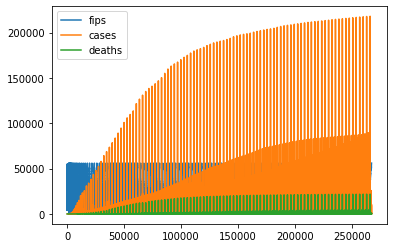

In [17]:
covid19_data.plot()

In [18]:
states_pie_chart= covid19_data.groupby(['state'])[['cases', 'deaths']].sum()

In [19]:
states_pie_chart

,cases,deaths
state,,
Alabama,1090608,36701
Alaska,38063,645
Arizona,1421787,52857
Arkansas,493339,8547
California,7009687,250772
Colorado,1636997,85622
Connecticut,2677234,230582
Delaware,544218,20270
District of Columbia,519380,26136


In [20]:
states_pie_chart_labels = covid19_data.groupby(['state'])[['state']].min()

In [21]:
states_pie_chart_labels

,state
state,
Alabama,Alabama
Alaska,Alaska
Arizona,Arizona
Arkansas,Arkansas
California,California
Colorado,Colorado
Connecticut,Connecticut
Delaware,Delaware
District of Columbia,District of Columbia


In [22]:
labels = states_pie_chart_labels['state']

In [33]:
seven_states = labels.iloc[[0,5,15,18,23, 30, 35]]

In [34]:
cases = states_pie_chart['cases']

In [35]:
values = cases.iloc[[0,5,15,18,23, 30, 35]]

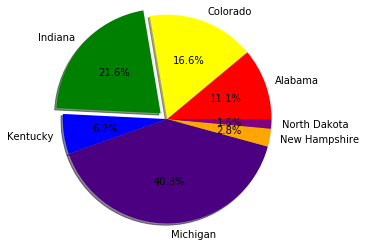

In [37]:
# defining labels 
activities = seven_states  
  
# portion covered by each label 
slices = values
  
# color for each label 
colors = ['red', 'yellow', 'green', 'blue', 'indigo', 'orange', 'purple'] 
  
# plotting the pie chart 
plt.pie(slices, labels = activities, colors=colors,  
        startangle=0, shadow = True, explode = (0, 0, 0.1, 0, 0, 0, 0), 
        radius = 1.2, autopct = '%1.1f%%') 
  
# plotting legend 
#plt.legend() 
  
# showing the plot 
plt.show()